In [1]:
from google.colab import files

from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.grid"] = True
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

In [4]:
df = pd.read_excel("/content/drive/MyDrive/Proyecto Integrador/transcripts.xlsx", header=0, dtype=str)
df.head()

date sequence      name n_utterance      section  \
0  19760329        1     BURNS           1  TRANSCRIPTS   
1  19760329        2  OCONNELL           1  TRANSCRIPTS   
2  19760329        3     BURNS           2  TRANSCRIPTS   
3  19760329        4  COLDWELL           1  TRANSCRIPTS   
4  19760329        5  OCONNELL           2  TRANSCRIPTS   

                                                text  
0  Gentlemen, we're ready. This will now be a mee...  
1  Yes, Mr. Chairman. The Committee will recall t...  
2  Thank you, Mr. O'Connell. Are there any questi...  
3  One question, Tom. Do you gather any sense or ...  
4  Mr. Chairman, Governor, we've had no conversat...

**Instrucciones copiadas directamente de la página**

**date** is the date of the FOMC meeting

**sequence** this orders each speaker utterance within the meeting

**name** is the last name of the speaker

**n_utterance** which utterance by the current speaker within the meeting (e.g. the tenth time Greenspan spoke is 10)

**section** in which section of the meeting was the current utternance a part of (either ECSIT for the discussion of the economic situation, MPS for a discussion of monetary policy, or AGGREGATES for biannual discussions of the monetary aggregates. See the paper for details. Note: In the paper I used these values from Hansen, McMahon, and Prat, but I did this starting in 1995 myself in this file.

**text** the text of the utterance

In [5]:
#Si se va a trabajar solo con el texto, se eliminan las demás columnas
df_texto = df.drop(columns=["sequence","name","n_utterance","section"])
df_texto

date                                               text
0       19760329  Gentlemen, we're ready. This will now be a mee...
1       19760329  Yes, Mr. Chairman. The Committee will recall t...
2       19760329  Thank you, Mr. O'Connell. Are there any questi...
3       19760329  One question, Tom. Do you gather any sense or ...
4       19760329  Mr. Chairman, Governor, we've had no conversat...
...          ...                                                ...
143264  20191211  Thank you very much, John. Do I have a motion ...
143265  20191211                   With great enthusiasm, so moved.
143266  20191211                                          A second?
143267  20191211                                            Second.
143268  20191211  Without objection. Lorie, congratulations. [Ap...

[143269 rows x 2 columns]

In [6]:
#agrupamos el texto por fechas, revisando primero que no haya nulls, eliminando los existentes
df_texto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143269 entries, 0 to 143268
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    143269 non-null  object
 1   text    143239 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


In [7]:
df_limpio = df_texto.dropna()
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143239 entries, 0 to 143268
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    143239 non-null  object
 1   text    143239 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [8]:
df_limpio["date"] = pd.to_datetime(df_limpio["date"], format="%Y%m%d", errors="coerce")
df_limpio.head()

/tmp/ipython-input-905182224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio["date"] = pd.to_datetime(df_limpio["date"], format="%Y%m%d", errors="coerce")


date                                               text
0 1976-03-29  Gentlemen, we're ready. This will now be a mee...
1 1976-03-29  Yes, Mr. Chairman. The Committee will recall t...
2 1976-03-29  Thank you, Mr. O'Connell. Are there any questi...
3 1976-03-29  One question, Tom. Do you gather any sense or ...
4 1976-03-29  Mr. Chairman, Governor, we've had no conversat...

In [9]:
df_transcripts = df_limpio.groupby("date")["text"].apply(lambda x: " ".join(x.astype(str))).reset_index()

In [10]:
df_transcripts.head(1) #son documentos muy largos, así que se recomienda ver solo 1 a la vez

date                                               text
0 1976-03-29  Gentlemen, we're ready. This will now be a mee...

In [11]:
#si nos fijamos en las transcripciones detalladamente, podemos ver que cuentan con las fechas y números de página del documento que seguramente
#estaban a pie de página, en el formato 3/29/76 -2-.
#asimismo, hay corchetes encerrando palabras
import re

In [12]:
reggex = r"\b\d{1,2}/\d{1,2}/\d{2}\s*-\s*\d+\s*-"
df_transcripts["text"] = df_transcripts["text"].str.replace(reggex, "", regex=True)
df_transcripts.head(1)

date                                               text
0 1976-03-29  Gentlemen, we're ready. This will now be a mee...

In [13]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
mystopwords = stopwords.words("english")
print(mystopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [15]:
#dejamos finalmente solo las palabras del texto
def clean_tok(text):
    words = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', text).lower()   # Solo consideramos caracteres letras, observa que lo extendemos al español.
    words = re.sub(r'\s{2,}', ' ', words.strip())      # Eliminemos espacios en blanco extras entre palabras o al inicio o final de cada frase.
    words = re.findall(r'\b[a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]{2,}\b', words)  #eliminar palabras de un solo carácter
    tokens = [palabra for palabra in words if palabra not in mystopwords] #eliminar stopwords

    return tokens

In [16]:
# Aplicamos el proceso de limpieza y tokenización:

df_transcripts["tokens"] = df_transcripts["text"].apply(lambda x: clean_tok(x))

In [17]:
df_transcripts

date                                               text  \
0   1976-03-29  Gentlemen, we're ready. This will now be a mee...   
1   1976-04-20  All right, gentlemen, we'll get our meeting un...   
2   1976-05-18  Gentlemen, we'll get our meeting under way. Du...   
3   1976-06-22  Gentlemen, we have a special meeting, and our ...   
4   1976-07-20  Gentlemen, we have a brief meeting scheduled f...   
..         ...                                                ...   
361 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
362 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
363 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
364 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   
365 2019-12-11  Good morning, everyone. This meeting, as usual...   

                                                tokens  
0    [gentlemen, ready, meeting, federal, open, mar...  
1    [right, gentlemen, get, meeting, way, know, sc...  
2    [gentlemen, get, meeting, way, past, two, thre...  
3    [gentlemen, special, meeting, newest, governor...  
4    [gentlemen, brief, meeting, scheduled, afterno...  
..                                                 ...  
361  [good, morning, everyone, let, get, started, m...  
362  [good, morning, everyone, participants, good, ...  
363  [okay, good, morning, everyone, meeting, usual...  
364  [good, morning, everyone, participants, good, ...  
365  [good, morning, everyone, meeting, usual, join...  

[366 rows x 3 columns]

In [18]:
#Con la parte de texto integrada, ahora integramos el excel con las tasa de la fed
df_tasas = pd.read_excel("/content/drive/MyDrive/Proyecto Integrador/FED tasas.xlsx", header=0)
df_tasas

Fecha  Tipos de interés  Cambio tipo de Interés
0  1991-03-08            0.0600                     NaN
1  1991-04-30            0.0575                 -0.0025
2  1991-08-06            0.0550                 -0.0025
3  1991-09-13            0.0525                 -0.0025
4  1991-10-31            0.0500                 -0.0025
..        ...               ...                     ...
78 2018-09-27            0.0200                  0.0025
79 2018-12-20            0.0225                  0.0025
80 2019-08-01            0.0200                 -0.0025
81 2019-09-19            0.0175                 -0.0025
82 2019-10-31            0.0150                 -0.0025

[83 rows x 3 columns]

In [19]:
df_tasas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Fecha                   83 non-null     datetime64[ns]
 1   Tipos de interés        83 non-null     float64       
 2   Cambio tipo de Interés  82 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 KB


In [20]:
df_tasas["Fecha"] = pd.to_datetime(df_tasas["Fecha"])
df_tasas = df_tasas.rename(columns={'Fecha': 'date'})

In [21]:
df_tasas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    83 non-null     datetime64[ns]
 1   Tipos de interés        83 non-null     float64       
 2   Cambio tipo de Interés  82 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 KB


In [22]:
#modificamos el transcript para dejar solo aquellos en el periodo 1991-2019
df_transcripts = df_transcripts[df_transcripts["date"] >= "1991-03-07"]
df_transcripts = df_transcripts[df_transcripts["date"] <= "2019-10-31"]
df_transcripts

date                                               text  \
135 1991-03-26  This is the first time in a long time that [th...   
136 1991-05-14  Are there any comments raised by the report on...   
137 1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
138 1991-08-20  Good morning, everyone. Would somebody like to...   
139 1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
..         ...                                                ...   
360 2019-05-01  Good morning, everyone. PARTICIPANTS. Good mor...   
361 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
362 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
363 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
364 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   

                                                tokens  
135  [first, time, long, time, committee, membershi...  
136  [comments, raised, report, examination, system...  
137  [statement, see, appendix, questions, sam, lee...  
138  [good, morning, everyone, would, somebody, lik...  
139  [good, morning, everyone, tom, hoenig, us, off...  
..                                                 ...  
360  [good, morning, everyone, participants, good, ...  
361  [good, morning, everyone, let, get, started, m...  
362  [good, morning, everyone, participants, good, ...  
363  [okay, good, morning, everyone, meeting, usual...  
364  [good, morning, everyone, participants, good, ...  

[230 rows x 3 columns]

In [23]:
df_FED = pd.merge_asof(
    df_transcripts.sort_values("date"),
    df_tasas.sort_values("date"),
    on="date",
    direction="forward"
)
df_FED.head()

print("Valores faltantes por columna:")
print(df_FED.isna().sum())

print("\nEstadísticas descriptivas:")
display(df_FED.describe(include='all'))

Valores faltantes por columna:
date                      0
text                      0
tokens                    0
Tipos de interés          0
Cambio tipo de Interés    0
dtype: int64

Estadísticas descriptivas:


date  \
count                             230   
unique                            NaN   
top                               NaN   
freq                              NaN   
mean    2005-07-14 08:33:23.478260864   
min               1991-03-26 00:00:00   
25%               1998-05-29 18:00:00   
50%               2005-07-20 00:00:00   
75%               2012-09-02 06:00:00   
max               2019-10-30 00:00:00   
std                               NaN   

                                                     text  \
count                                                 230   
unique                                                230   
top     This is the first time in a long time that [th...   
freq                                                    1   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                                                   tokens  Tipos de interés  \
count                                                 230          230.0000   
unique                                                230               NaN   
top     [first, time, long, time, committee, membershi...               NaN   
freq                                                    1               NaN   
mean                                                  NaN            0.0269   
min                                                   NaN            0.0000   
25%                                                   NaN            0.0050   
50%                                                   NaN            0.0200   
75%                                                   NaN            0.0500   
max                                                   NaN            0.0650   
std                                                   NaN            0.0212   

        Cambio tipo de Interés  
count                 230.0000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                    0.0003  
min                    -0.0100  
25%                    -0.0025  
50%                     0.0025  
75%                     0.0025  
max                     0.0075  
std                     0.0033

In [33]:
# Conversión de fechas (formato dd/mm/yyyy)
df_FED['date'] = pd.to_datetime(df_FED['date'], dayfirst=True, errors='coerce')

# Conversión de porcentajes a numérico
def to_ratio(s):
    s = s.astype(str).str.strip().str.replace('%','', regex=False).str.replace(',','.', regex=False)
    s = pd.to_numeric(s, errors='coerce')
    if s.dropna().median() > 1:
        s = s / 100.0
    return s

df_FED['Tipos de interés'] = to_ratio(df_FED['Tipos de interés'])
if 'Cambio tipo de Interés' in df_FED.columns:
    df_FED['Cambio tipo de Interés'] = to_ratio(df_FED['Cambio tipo de Interés'])

df_FED

date                                               text  \
0   1991-03-26  This is the first time in a long time that [th...   
1   1991-05-14  Are there any comments raised by the report on...   
2   1991-07-03  [Statement--see Appendix.] Questions for Sam? ...   
3   1991-08-20  Good morning, everyone. Would somebody like to...   
4   1991-10-01  Good morning, everyone. We have Tom Hoenig wit...   
..         ...                                                ...   
225 2019-05-01  Good morning, everyone. PARTICIPANTS. Good mor...   
226 2019-06-19  Good morning, everyone. Let’s get started. Thi...   
227 2019-07-31  Good morning, everyone. PARTICIPANTS. Good mor...   
228 2019-09-18  Okay. Good morning, everyone. This meeting, as...   
229 2019-10-30  Good morning, everyone. PARTICIPANTS. Good mor...   

                                                tokens  Tipos de interés  \
0    [first, time, long, time, committee, membershi...            0.0575   
1    [comments, raised, report, examination, system...            0.0550   
2    [statement, see, appendix, questions, sam, lee...            0.0550   
3    [good, morning, everyone, would, somebody, lik...            0.0525   
4    [good, morning, everyone, tom, hoenig, us, off...            0.0500   
..                                                 ...               ...   
225  [good, morning, everyone, participants, good, ...            0.0200   
226  [good, morning, everyone, let, get, started, m...            0.0200   
227  [good, morning, everyone, participants, good, ...            0.0200   
228  [okay, good, morning, everyone, meeting, usual...            0.0175   
229  [good, morning, everyone, participants, good, ...            0.0150   

     Cambio tipo de Interés  
0                   -0.0025  
1                   -0.0025  
2                   -0.0025  
3                   -0.0025  
4                   -0.0025  
..                      ...  
225                 -0.0025  
226                 -0.0025  
227                 -0.0025  
228                 -0.0025  
229                 -0.0025  

[230 rows x 5 columns]

In [35]:
print("Valores faltantes por columna:")
print(df_FED.isna().sum())

Valores faltantes por columna:
date                      0
text                      0
tokens                    0
Tipos de interés          0
Cambio tipo de Interés    0
dtype: int64


In [36]:
print("Estadísticas descriptivas (numéricas):")
display(df_FED.describe(include="all"))

Estadísticas descriptivas (numéricas):


date  \
count                             230   
unique                            NaN   
top                               NaN   
freq                              NaN   
mean    2005-07-14 08:33:23.478260864   
min               1991-03-26 00:00:00   
25%               1998-05-29 18:00:00   
50%               2005-07-20 00:00:00   
75%               2012-09-02 06:00:00   
max               2019-10-30 00:00:00   
std                               NaN   

                                                     text  \
count                                                 230   
unique                                                230   
top     This is the first time in a long time that [th...   
freq                                                    1   
mean                                                  NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   
std                                                   NaN   

                                                   tokens  Tipos de interés  \
count                                                 230          230.0000   
unique                                                230               NaN   
top     [first, time, long, time, committee, membershi...               NaN   
freq                                                    1               NaN   
mean                                                  NaN            2.6891   
min                                                   NaN            0.0000   
25%                                                   NaN            0.5000   
50%                                                   NaN            2.0000   
75%                                                   NaN            5.0000   
max                                                   NaN            6.5000   
std                                                   NaN            2.1174   

        Cambio tipo de Interés  
count                 230.0000  
unique                     NaN  
top                        NaN  
freq                       NaN  
mean                    0.0003  
min                    -0.0100  
25%                    -0.0025  
50%                     0.0025  
75%                     0.0025  
max                     0.0075  
std                     0.0033


Outliers por variable:
 - Tipos de interés: 0
 - Cambio tipo de Interés: 0


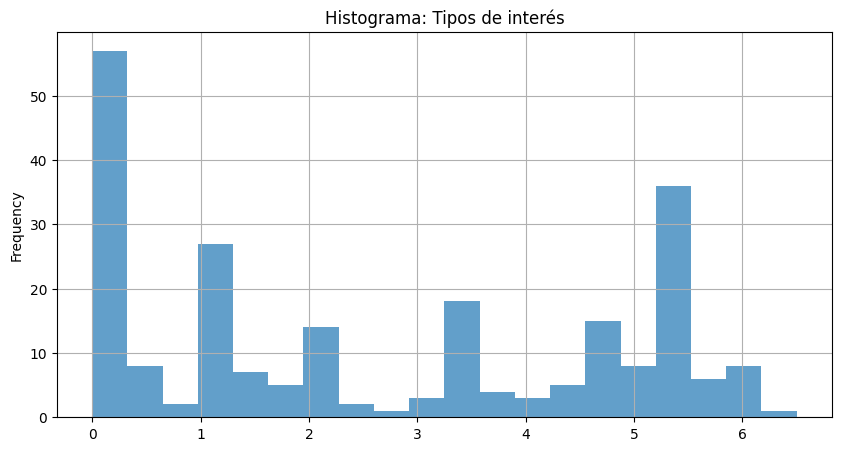

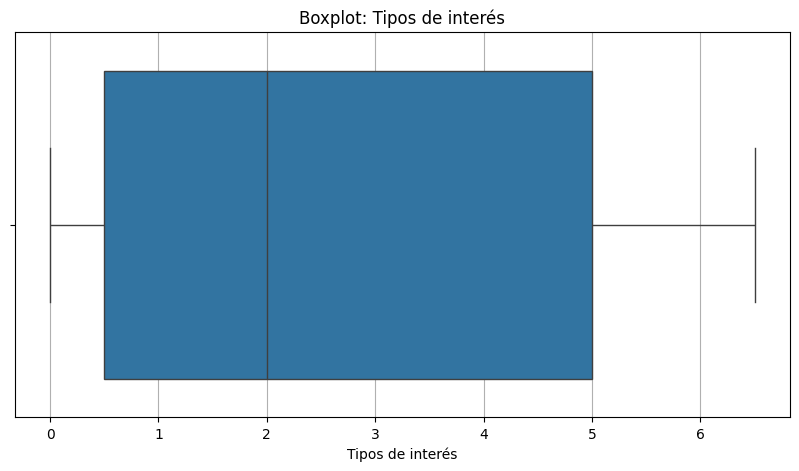

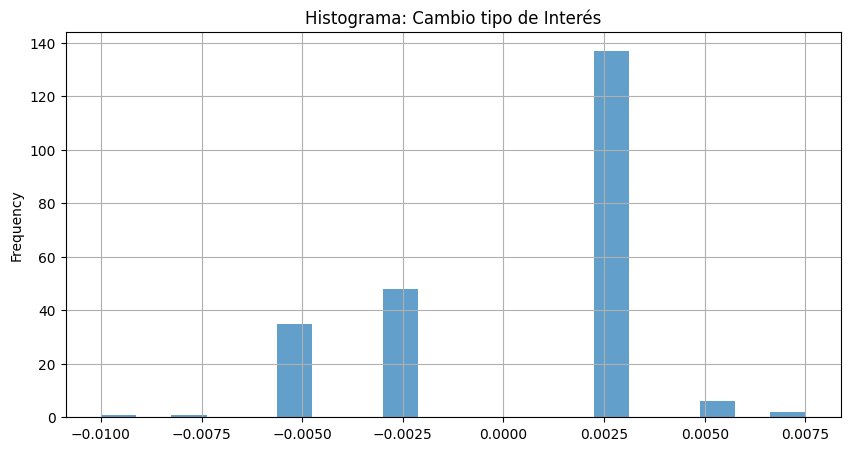

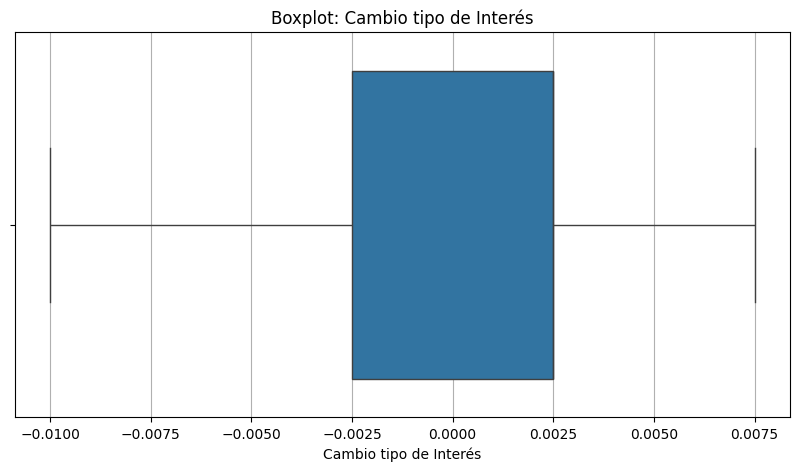

Sesgo (skew) de variables numéricas:
Tipos de interés          0.2109
Cambio tipo de Interés   -0.6637
dtype: float64


In [37]:
# Detección de outliers
def count_outliers_iqr(x, k=1.5):
    x = pd.to_numeric(x, errors='coerce').dropna()
    if x.empty: return 0
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    low, high = q1 - k*iqr, q3 + k*iqr
    return ((x < low) | (x > high)).sum()

num_cols = df_FED.select_dtypes(include='number').columns

print("\nOutliers por variable:")
for c in num_cols:
    print(f" - {c}: {count_outliers_iqr(df_FED[c])}")

# Visualización univariada
for c in num_cols:
    df_FED[c].plot(kind="hist", bins=20, alpha=0.7, title=f"Histograma: {c}")
    plt.show()
    sns.boxplot(x=df_FED[c]); plt.title(f"Boxplot: {c}"); plt.show()

# Sesgo skewness
print("Sesgo (skew) de variables numéricas:")
print(df_FED[num_cols].skew(numeric_only=True))

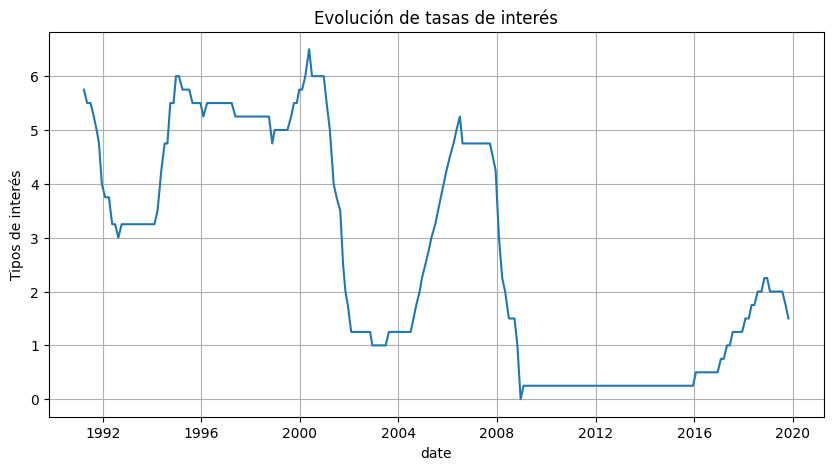

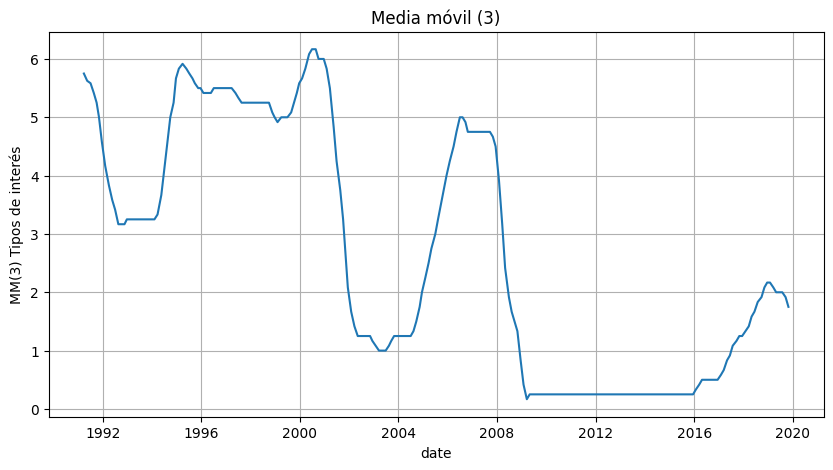

In [39]:
# Tendencias temporales
df_plot = df_FED.dropna(subset=['date']).sort_values('date')

plt.plot(df_plot['date'], df_plot['Tipos de interés'])
plt.xlabel("date")
plt.ylabel("Tipos de interés")
plt.title("Evolución de tasas de interés")
plt.show()

# Media móvil de 3 periodos (opcional)
if len(df_plot) >= 3:
    ma3 = df_plot['Tipos de interés'].rolling(3, min_periods=1).mean()
    plt.plot(df_plot['date'], ma3)
    plt.xlabel("date")
    plt.ylabel("MM(3) Tipos de interés")
    plt.title("Media móvil (3)")
    plt.show()


In [41]:
# Cardinalidad categóricas
cat_cols = df_FED.select_dtypes(include=['object','category']).columns

if len(cat_cols) == 0:
    print("No hay variables categóricas.")
else:
    print("Cardinalidad de categóricas:")
    for c in cat_cols:
        # Convertimos a string por si hay listas u objetos raros
        cardinalidad = df_FED[c].astype(str).nunique()
        print(f" - {c}: {cardinalidad} categorías")


Cardinalidad de categóricas:
 - text: 230 categorías
 - tokens: 230 categorías


**Conclusiones**

#  Conclusiones del Análisis Exploratorio de Datos

###  Estructura de los datos
- El dataset contiene tres variables principales:  
  - *date* (temporal).  
  - *Tipos de interés* (numérica).  
  - *Cambio tipo de Interés* (numérica).  
- Se detectaron además dos variables categóricas (text y tokens) con *alta cardinalidad (230 categorías cada una)*, no relevantes para el análisis numérico.  
- No se encontraron problemas significativos de valores faltantes tras la conversión de formatos.

---

###  Análisis univariante
- En los *histogramas de tipos de interés, los valores se concentran principalmente entre **3% y 6%*, con una distribución relativamente simétrica (sesgo ≈ 0.21).  
- Para el *cambio de tipo de interés*, la mayoría de las variaciones son pequeñas y positivas (~0.25%), aunque se observan algunos valores negativos y extremos, con un sesgo negativo más marcado (-0.66).  
- Los *boxplots* confirman la existencia de valores atípicos en ambas variables, pero dentro de rangos esperables en series económicas.

---

###  Análisis temporal
- La serie muestra un comportamiento *cíclico de las tasas de interés*:  
  - Picos alrededor de los años *2000 y 2007* (superiores al 6%).  
  - Caídas abruptas posteriores, con un periodo prolongado cercano a *0% entre 2009 y 2015*, correspondiente a políticas monetarias expansivas.  
  - Recuperación gradual a partir de 2016 y nueva reducción hacia 2020.  
- La *media móvil de 3 periodos* confirma estas tendencias y ayuda a visualizar los ciclos de alzas y bajas.

---

###  Análisis multivariante
- Tipos de interés y Cambio tipo de Interés presentan *correlación baja*, lo que indica que no hay una relación lineal fuerte.  
- Sin embargo, visualmente se observa que los cambios suelen coincidir con puntos de inflexión en la evolución de la tasa.

---

###  Preprocesamiento aplicado
- Conversión de la columna de fechas al formato estándar dd/mm/yyyy.  
- Conversión de porcentajes a valores numéricos proporcionales.  
- Identificación de valores atípicos mediante el método IQR.  
- Revisión de cardinalidad en variables categóricas (se confirmó que no afectan el análisis principal).

---

###  Conclusión general
El análisis exploratorio permitió identificar que las tasas de interés siguen un *patrón cíclico* con picos y caídas pronunciadas a lo largo de tres décadas.  
Las distribuciones presentan valores extremos pero coherentes con fenómenos económicos globales.  
El preprocesamiento aseguró datos consistentes y listos para un análisis más avanzado o la construcción de modelos predictivos.  
No se detectaron problemas graves de calidad de datos, más allá de la presencia esperada de outliers financieros.